# General Usage

#### Import pygcc

In [1]:
import pygcc
print(pygcc.__version__)
from pygcc.pygcc_utils import *

KeyboardInterrupt: 

#### Read database by specifying the direct- or sequential- access and source database

##### Using the default sequential-access database - speq21.dat

In [2]:
ps = db_reader(sourcedb = 'thermo.2021', sourceformat = 'gwb')
# ps.dbaccessdic, ps.sourcedic,  ps.specielist

##### Using the user-specified sequential-access database

In [3]:
ps = db_reader(dbaccess = './database/slop07.dat', sourcedb = 'thermo.2021', sourceformat = 'gwb')
# ps.dbaccessdic, ps.sourcedic,  ps.specielist

Duplicate found for species "AlOH++" in slop07.dat
Duplicate found for species "MgCO3(aq)" in slop07.dat
Duplicate found for species "CaCO3(aq)" in slop07.dat
Duplicate found for species "SrCO3(aq)" in slop07.dat
Duplicate found for species "BaCO3(aq)" in slop07.dat
Duplicate found for species "BaF+" in slop07.dat
Duplicate found for species "Sr(Succ)(aq)" in slop07.dat
Duplicate found for species "Sc(Glut)+(aq)" in slop07.dat
Duplicate found for species "AMP2-" in slop07.dat
Duplicate found for species "HAMP-" in slop07.dat
Duplicate found for species "+H2AMP-" in slop07.dat


### Example: Calculate water properties

*With IAPWS95*

In [4]:
water = iapws95(T = np.array([  0.01, 25, 60,  100, 150,  200,  250,  300]), P = 200)
print('Density:', water.rho)
print('Gibbs Energy:', water.G)
print('Enthalpy:', water.H)
print('Entropy:', water.S)

Density: [1009.73580931 1005.83998999  991.7058825   967.43838406  927.69054221
  877.9652082   816.08878805  734.71208475]
Gibbs Energy: [-56194.26867312 -56592.33889817 -57211.87993461 -58000.04190115
 -59093.00868798 -60294.40876454 -61596.26593847 -62995.11966287]
Enthalpy: [-68680.33499723 -68236.29564253 -67613.18053963 -66897.34619192
 -65991.9279271  -65062.66635227 -64087.83220987 -63021.29280159]
Entropy: [15.14005087 16.69550855 18.67153539 20.7005717  22.97720284 25.05223509
 27.00976077 28.9549847 ]


*With ZhangDuan*

In [5]:
water = ZhangDuan(T= np.array([1000, 1050]), P = np.array([1000, 2000]))
print(water.rho, water.G)

[175.8286937  314.74510733] [-91457.05964074 -92350.23024927]


### Example: Calculate water dielectric constants

In [6]:
dielect = water_dielec(T= np.array([1000, 1050]), P = np.array([1000, 2000]), Dielec_method = 'DEW')
dielect.E, dielect.rhohat, dielect.Ah, dielect.Bh

(array([1.19637079, 2.52660344]),
 array([0.17582869, 0.31474511]),
 array([12.8720893 ,  5.29642074]),
 array([0.5403405 , 0.48797969]))

In [7]:
dielect = water_dielec(T= np.array([100, 150]), P = np.array([100, 200]), Dielec_method = 'JN91')
dielect.E, dielect.rhohat, dielect.Ah, dielect.Bh

(array([55.83017195, 44.79388023]),
 array([0.96293375, 0.92769054]),
 array([0.59551378, 0.67352582]),
 array([0.34191435, 0.35183609]))

### Example: Calculate quartz properties

*With Maier-Kelly powerlaw*

In [8]:
Temp = np.array([100, 200, 400, 600, 800, 900])
ps = db_reader()
sup = heatcap( T = Temp, P = 1, Species = 'Quartz', Species_ppt = ps.dbaccessdic['Quartz'], 
             method = 'SUPCRT')
sup.dG, sup.dCp

(array([-205319.43164294, -206728.65136032, -210399.56629393,
        -215044.47020067, -220518.04896025, -223492.57970966]),
 array([12.34074489, 13.89377788, 16.14397572, 16.103911  , 16.491911  ,
        16.685911  ]))

*With Holland and Power's formulation*

In [9]:
Temp = np.array([100, 200, 400, 600, 800, 900])
pshp = db_reader(dbHP_dir = './database/supcrtbl.dat')
hp = heatcap( T = Temp, P = 10, Species = 'Quartz', Species_ppt = pshp.dbaccessdic['Quartz'], 
             method = 'HP11')
hp.dG, hp.dCp

Duplicate found for species "Fluorphlogopite" in supcrtbl.dat
Duplicate found for species "Arsenic" in supcrtbl.dat
Duplicate found for species "Arsenolite" in supcrtbl.dat


(array([-205491.44716714, -206900.38310661, -210575.79120014,
        -215228.32290096, -220682.44526921, -223649.25812766]),
 array([12.4075447 , 13.99685509, 16.16426364, 16.05341748, 16.6660167 ,
        16.90252028]))

*With Berman's formulation*

In [10]:
Temp = np.array([100, 200, 400, 600, 800, 900])
ps = db_reader(dbBerman_dir = './database/berman.dat')
bm = heatcap( T = Temp, P = 1, Species = 'Quartz', Species_ppt = ps.dbaccessdic['Quartz'], 
             method = 'berman88')
bm.dG, bm.dCp

Duplicate found for species "Cordierite" in berman.dat


(array([-205498.95550508, -206907.11144614, -210575.29239247,
        -215221.44900321, -220654.77893829, -223612.45803826]),
 array([12.323813  , 13.87414095, 16.29997608, 16.24449507, 16.72930639,
        16.90352372]))

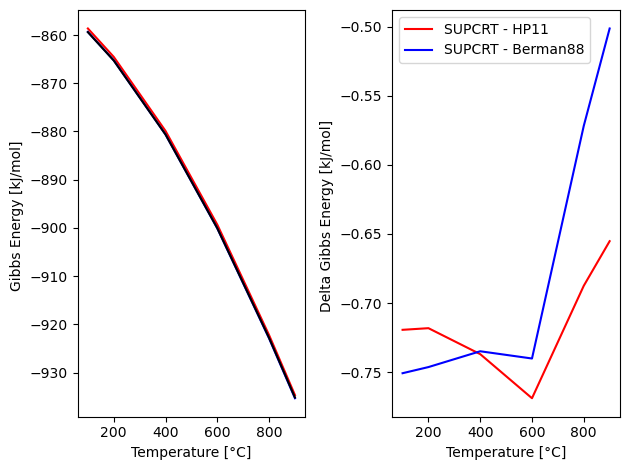

In [11]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(Temp, sup.dG*4.182/1e3, 'r', Temp, hp.dG*4.182/1e3, 'b', Temp, bm.dG*4.182/1e3, 'k')
ax1.set_xlabel('Temperature [°C]'); ax1.set_ylabel('Gibbs Energy [kJ/mol] ')
plt.legend(['SUPCRT', 'HP11', 'Berman88'])
ax2.plot(Temp, hp.dG*4.182/1e3 - sup.dG*4.182/1e3, 'r', Temp, bm.dG*4.182/1e3 - sup.dG*4.182/1e3, 'b')
ax2.set_xlabel('Temperature [°C]'); ax2.set_ylabel('Delta Gibbs Energy [kJ/mol] ')
plt.legend(['SUPCRT - HP11', 'SUPCRT - Berman88'])
fig.tight_layout()

### Example: Calculate olivine solid solutions

In [12]:
calc = calcRxnlogK( X = 0.85,T = np.array([300, 400, 450]), P = np.array([200, 200, 200]),
                   Specie = 'olivine', dbaccessdic = ps.dbaccessdic, densityextrap = True)
calc.logK, calc.Rxn

(array([ 9.1687495 , 21.15012305, 17.0669597 ]),
 {'type': 'ol',
  'name': 'Fo85',
  'formula': 'Mg1.70Fe0.30Si1O4',
  'MW': 150.1557,
  'min': ['Mg1.70Fe0.30Si1O4',
   ' R&H95, Stef2001',
   -466862.12264868076,
   nan,
   26.21037219328013,
   44.049,
   24.058078393881452,
   0.017393236137667304,
   -890893.8814531548,
   171.38145315487571,
   -3.6586998087954105e-06],
  'spec': ['H+', 'Mg++', 'Fe++', 'SiO2(aq)', 'H2O'],
  'coeff': [-4, 1.7, 0.30000000000000004, 1, 2],
  'nSpec': 5,
  'V': 44.049,
  'source': ' R&H95, Stef2001',
  'elements': ['1.7000', 'Mg', '0.3000', 'Fe', '1.0000', 'Si', '4.0000', 'O']})

### Example: Calculate glauconite mineral properties

In [13]:
Temp = np.array([0.01, 20, 30, 40, 60, 80, 100, 150])
calc = calcRxnlogK(T = Temp, P = 'T', Specie = 'clay', dbaccessdic = ps.dbaccessdic, densityextrap = True,
                   elem = ['Glauconite', '3.654', '.687', '1.175', '0.079', '0.337', '0.679', '0.212', '0.0359', '0'])
calc.logK, calc.Rxn

(array([12.25870693,  9.57522298,  8.38766478,  7.29038298,  5.33107899,
         3.63394016,  2.14713934, -0.90587825]),
 {'type': 'Smectite',
  'name': 'Glauconite',
  'formula': 'K0.68Na0.21Fe0.08Ca0.04Mg0.34Al0.69FeIII1.18Si3.654O10(OH)2',
  'MW': 426.25271512,
  'min': ['K0.68Na0.21Fe0.08Ca0.04Mg0.34Al0.69FeIII1.18Si3.654O10(OH)2',
   'B2015, B2021',
   -1169917.235355269,
   -1253395.3186848022,
   90.78782849872155,
   141.34069593680297,
   77.70879420984171,
   83.36446524554509,
   -17.841879278113826],
  'spec': ['H+',
   'K+',
   'Na+',
   'Fe++',
   'Ca++',
   'Mg++',
   'Al+++',
   'Fe+++',
   'SiO2(aq)',
   'H2O'],
  'coeff': [-7.381,
   0.679,
   0.212,
   0.079,
   0.0359,
   0.337,
   0.687,
   1.175,
   3.654,
   4.692],
  'nSpec': 10,
  'V': 141.34069593680297,
  'dG': -4894.933712726446,
  'dHf': -5244.206013377212,
  'Cp': 345.17439398884756,
  'source': 'B2015, B2021',
  'elements': ['0.0359',
   'Ca',
   '0.6790',
   'K',
   '0.2120',
   'Na',
   '1.2540',
   'F

### Example: Create new reactions and calculate equilibrium constants

#### An example with pyrite, pyrrhotite, magnetite (PPM) reaction
Pyrite + 4 H<sub>2</sub>O + 2 Pyrrhotite &rarr; 4 H<sub>2</sub>S<sub>(aq)</sub> + Magnetite

Then we can include the reaction in sourcedic, one of the output of db_reader, which is a dictionary of list of reaction coefficients and species. An example with the format for sourcedic is as follows:

> ps.sourcedic['Name'] = ['formula', number of reactants in the reaction, 'coefficient of specie 1', 'specie 1', 'coefficient of specie 2', 'specie 2']

> AB &rarr; 0.5 A<sub>2</sub><sub>(aq)</sub> + B

> ps.sourcedic['AB'] = ['AB', 2, '0.5', 'A2(aq), '1', 'B']

In [14]:
ps = db_reader(sourcedb = './database/thermo.2021.dat', sourceformat = 'gwb')
ps.sourcedic['Pyrite'] = ['', 4, '4', 'H2S(aq)', '1', 'Magnetite',  '-2', 'Pyrrhotite', '-4', 'H2O']
Temp = np.array([300.0000, 325, 350.0000, 400.0000, 415, 425.0000, 435, 450.0000])
Press = 500*np.ones(np.size(Temp))
log_K_PPM = calcRxnlogK( T = Temp, P = Press, Specie = 'Pyrite', dbaccessdic = ps.dbaccessdic,
                        sourcedic = ps.sourcedic, specielist = ps.specielist).logK
log_K_PPM

array([-9.61842122, -8.38742387, -7.21969753, -4.97772897, -4.29319566,
       -3.81890541, -3.32234015, -2.52289322])

### Example: Generate GWB thermodynamic database

_Note: GWB requires exactly 8 temperature and pressure pairs_

In [15]:
# Vectors for Temperature (C) and Pressure (bar) inputs
T = np.array([  0.010,   25.0000 ,  60.0000,  100.0000, 120.0000,  150.0000,  250.0000,  300.0000])
P = 350*np.ones(np.size(T))
nCa = 1

write GWB using default sourced database, with inclusion of solid_solution and clay thermo properties

In [16]:
%%time
write_database(T = T, P = P, cpx_Ca = nCa, solid_solution = 'Yes',  clay_thermo = 'Yes', 
               dataset = 'GWB')

Success, your new GWB database is ready for download
CPU times: total: 16.2 s
Wall time: 17 s


write GWB using user-specified sourced database, with inclusion of solid_solution and clay thermo properties

In [17]:
%%time
write_database(T = T, P = 175, cpx_Ca = nCa, solid_solution = 'Yes', clay_thermo = 'Yes',
                sourcedb = './database/thermo.29Sep15.dat', dataset = 'GWB')

Success, your new GWB database is ready for download
CPU times: total: 13.9 s
Wall time: 14.6 s


write GWB using Jan2020/Apr20 formatted sourced database

In [18]:
%%time
write_database(T = T, P = 125, cpx_Ca = nCa, solid_solution = True, clay_thermo = True,
                sourcedb = './database/thermo.com.tdat', dataset = 'GWB')

Success, your new GWB database is ready for download
CPU times: total: 15.9 s
Wall time: 16.6 s


write GWB using Jan2020/Apr20 formatted sourced database with logK as polynomial coefficients, using Tmax and Tmin

In [19]:
%%time
# Temp = np.array([  0.01, 25, 60,  100, 150,  200,  250,  300])
write_database(T = [0, 300], P = 150, clay_thermo = True, logK_form = 'polycoeffs', 
               sourcedb =  './database/thermo.com.tdat', dataset = 'GWB')

Success, your new GWB database is ready for download
CPU times: total: 13 s
Wall time: 13.5 s


write GWB using Mar21 formatted sourced database with logK as polynomial coefficients

In [20]:
%%time
# Temp = np.array([  0.01, 25, 60,  100, 150,  200,  250,  300])
write_database(T = [0, 300], P = 145, clay_thermo = True, logK_form = 'polycoeffs', 
               sourcedb =  './database/thermo_latest.tdat', dataset = 'GWB')

Success, your new GWB database is ready for download
CPU times: total: 13.3 s
Wall time: 13.6 s


write GWB using user-specified sourced database and direct-access database (slop07) and FGL97 dielectric constant

In [21]:
%%time
write_database(T = [0, 400], P = 300, cpx_Ca = 0.5, solid_solution = 'Yes', Dielec_method = 'FGL97',
                dbaccess = './database/slop07.dat',
                sourcedb = './database/thermo.29Sep15.dat', dataset = 'GWB')

Duplicate found for species "AlOH++" in slop07.dat
Duplicate found for species "MgCO3(aq)" in slop07.dat
Duplicate found for species "CaCO3(aq)" in slop07.dat
Duplicate found for species "SrCO3(aq)" in slop07.dat
Duplicate found for species "BaCO3(aq)" in slop07.dat
Duplicate found for species "BaF+" in slop07.dat
Duplicate found for species "Sr(Succ)(aq)" in slop07.dat
Duplicate found for species "Sc(Glut)+(aq)" in slop07.dat
Duplicate found for species "AMP2-" in slop07.dat
Duplicate found for species "HAMP-" in slop07.dat
Duplicate found for species "+H2AMP-" in slop07.dat
Success, your new GWB database is ready for download
CPU times: total: 14 s
Wall time: 14.6 s


write GWB using default sourced database and direct-access database (slop07 with Berman mineral data) and FGL97 dielectric constant

In [22]:
%%time
write_database(T = [0, 340], P = 150, Dielec_method = 'FGL97',  dbaccess = './database/slop07.dat',
                dbBerman_dir = './database/berman.dat', dataset = 'GWB')

Duplicate found for species "AlOH++" in slop07.dat
Duplicate found for species "MgCO3(aq)" in slop07.dat
Duplicate found for species "CaCO3(aq)" in slop07.dat
Duplicate found for species "SrCO3(aq)" in slop07.dat
Duplicate found for species "BaCO3(aq)" in slop07.dat
Duplicate found for species "BaF+" in slop07.dat
Duplicate found for species "Sr(Succ)(aq)" in slop07.dat
Duplicate found for species "Sc(Glut)+(aq)" in slop07.dat
Duplicate found for species "AMP2-" in slop07.dat
Duplicate found for species "HAMP-" in slop07.dat
Duplicate found for species "+H2AMP-" in slop07.dat
Duplicate found for species "Cordierite" in berman.dat
Success, your new GWB database is ready for download
CPU times: total: 8.39 s
Wall time: 8.78 s


write GWB using Mar21 formatted sourced database and direct-access database (speq21 with HP mineral data) and DEW dielectric constant

In [23]:
%%time
write_database(T = [0, 275], P = 1100, Dielec_method = 'DEW',  dbaccess = './database/speq21.dat',
                dbHP_dir = './database/supcrtbl.dat', sourcedb =  './database/thermo_latest.tdat', dataset = 'GWB')

Duplicate found for species "Fluorphlogopite" in supcrtbl.dat
Duplicate found for species "Arsenic" in supcrtbl.dat
Duplicate found for species "Arsenolite" in supcrtbl.dat
Success, your new GWB database is ready for download
CPU times: total: 7.64 s
Wall time: 8.26 s


write GWB using user-specified sourced Pitzer database and default direct-access database along the saturation curve

In [24]:
%%time
write_database(T = [0, 350], P = 'T', dataset = 'GWB',  sourcedb = './database/thermo_hmw.tdat')

Success, your new GWB database is ready for download
CPU times: total: 3.2 s
Wall time: 3.5 s


write GWB using user-specified sourced EQ3/6 Pitzer database and default direct-access database

In [25]:
%%time
write_database(T = [0, 350], P = 250, dataset = 'GWB', sourcedb = './database/data0.hmw',
               sourceformat = 'EQ36')

Success, your new GWB database is ready for download
CPU times: total: 2.86 s
Wall time: 3.06 s


### Example: Generate EQ3/6 thermodynamic database

write EQ3/6 using default sourced database

In [26]:
%%time
write_database(T = T, P = P, cpx_Ca = 1, solid_solution = 'Yes', clay_thermo = 'Yes', 
               dataset = 'EQ36')

Success, your new EQ3/6 database is ready for download
CPU times: total: 16.6 s
Wall time: 17.3 s


write EQ3/6 user-specified sourced database

In [27]:
%%time
write_database(T = [0, 400], P = 350, cpx_Ca = 0.5, solid_solution = 'Yes', clay_thermo = 'Yes',
                sourcedb = './database/data0.geo', dataset = 'EQ36', sourcedb_codecs = 'latin-1')

Success, your new EQ3/6 database is ready for download
CPU times: total: 13.7 s
Wall time: 14.6 s


write EQ3/6 using user-specified sourced Pitzer database

In [28]:
%%time
write_database(T = [0, 350], P = 200, sourcedb = './database/data0.hmw', dataset = 'EQ36')

Success, your new EQ3/6 database is ready for download
CPU times: total: 2.86 s
Wall time: 3.01 s


write EQ3/6 user-specified sourced database using FGL97 dielectric constant

In [29]:
%%time
write_database(T = [0, 400], P = 300, cpx_Ca = 0.1, sourcedb = './database/data0.geo', 
               dataset = 'EQ36', solid_solution = 'Yes', Dielec_method = 'FGL97', clay_thermo = 'Yes')

Success, your new EQ3/6 database is ready for download
CPU times: total: 15.5 s
Wall time: 16.4 s


write EQ3/6 user-specified sourced database using DEW model

In [30]:
%%time
Temp = np.array([50, 100, 150, 300, 450, 500, 600, 700])
write_database(T = Temp, P = 1500, sourcedb = './database/data0.geo', dataset = 'EQ36', 
               Dielec_method = 'DEW')

Success, your new EQ3/6 database is ready for download
CPU times: total: 7.48 s
Wall time: 8.11 s


write EQ3/6 using default sourced GWB database and direct-access database

In [31]:
%%time
write_database(T = np.array([0.010, 25, 60, 100, 150, 200, 250, 300]), P = 250, dataset = 'EQ36', 
               sourcedb = 'thermo.2021', sourceformat = 'gwb', solid_solution = True, clay_thermo = True, 
               print_msg = True)

Success, your new EQ3/6 database is ready for download
Database for EQ36 generated successfully using JN91 dielectric constant,             thermo.2021.dat gwb source database, solid solution included with cpx excluded, clay thermodynamics included
CPU times: total: 1min 19s
Wall time: 1min 23s


### Example: Generate ToughReact thermodynamic database

write ToughReact using user-specified EQ3/6 database

In [32]:
%%time
write_database(T = T, P = P, cpx_Ca = nCa, solid_solution = 'Yes', sourcedb = './database/data0.dat',
                dataset = 'ToughReact', sourceformat = 'EQ36')

Success, your new ToughReact database is ready for download
CPU times: total: 17.1 s
Wall time: 17.8 s


write ToughReact using user-specified GWB database

In [33]:
%%time
write_database(T = [0, 350], P = 250, cpx_Ca = 0.25, clay_thermo = 'Yes', dataset = 'ToughReact',
                sourcedb = './database/thermo.com.tdat', sourceformat = 'GWB')

Success, your new ToughReact database is ready for download
CPU times: total: 7.64 s
Wall time: 7.86 s


write ToughReact using EQ3/6 user-specified Ptizer sourced database and JN91 dielectric constant

In [34]:
%%time
write_database(T = [0, 300], P = 200, sourceformat = 'EQ36', sourcedb = './database/data0.fmt',
                dataset = 'ToughReact', Dielec_method = 'JN91')

Success, your new ToughReact database is ready for download
CPU times: total: 3.73 s
Wall time: 4.02 s


### Example: Generate Pflotran thermodynamic database

 write Pflotran using user-specified EQ3/6 database

In [35]:
%%time
write_database(T = T, P = P, clay_thermo = 'Yes', sourcedb = './database/data0.dat',
                dataset = 'Pflotran', sourceformat = 'EQ36')

Success, your new Pflotran database is ready for download
CPU times: total: 9.42 s
Wall time: 9.72 s


write Pflotran using user-specified GWB database

In [36]:
%%time
write_database(T = [0, 350], P = 250, cpx_Ca = 0.1, solid_solution = True, clay_thermo = True,
               sourcedb = './database/thermo.com.tdat', dataset = 'Pflotran', sourceformat = 'GWB')

Success, your new Pflotran database is ready for download
CPU times: total: 13.6 s
Wall time: 14.1 s


### Example: Calculate clay mineral thermodynamics

In [37]:
#%% specify the direct access thermodynamic database
db_dic = db_reader(dbaccess = './database/speq21.dat').dbaccessdic

folder_to_save = 'output'
if os.path.exists(os.path.join(os.getcwd(), folder_to_save)) == False:
    os.makedirs(os.path.join(os.getcwd(), folder_to_save)) 
fid = open('./output/logK_05.txt', 'w')

logKRxn = calcRxnlogK(T = T, P = P, Specie = 'Clay', dbaccessdic = db_dic,
                        elem = ['Clinochlore', '3', '2', '0', '0', '5', '0', '0', '0', '0'],
                        densityextrap = True)
logK, Rxn = logKRxn.logK, logKRxn.Rxn

# output in EQ36 format
outputfmt(fid, logK, Rxn, dataset = 'EQ36')
# output in GWB format
outputfmt(fid, logK, Rxn, dataset = 'GWB')
# output in Pflotran format
outputfmt(fid, logK, Rxn, dataset = 'Pflotran')
# output in ToughReact format
outputfmt(fid, logK, Rxn, dataset = 'ToughReact')
fid.close()

### Example: Calculate plagioclase solid-solution thermodynamics

In [38]:
#%% specify the direct access thermodynamic database
db_dic = db_reader(dbaccess = './database/speq21.dat').dbaccessdic

folder_to_save = 'output'
if os.path.exists(os.path.join(os.getcwd(), folder_to_save)) == False:
    os.makedirs(os.path.join(os.getcwd(), folder_to_save)) 
fid = open('./output/logK_05.txt', 'w')

logKRxn = calcRxnlogK(T = T, dbaccessdic = db_dic, P = 'T', X = 0.634, Specie = 'Plagioclase',
                        densityextrap = True)
logK, Rxn = logKRxn.logK, logKRxn.Rxn

# output in EQ36 format
outputfmt(fid, logK, Rxn, dataset = 'EQ36')
# output in GWB format
outputfmt(fid, logK, Rxn, dataset = 'GWB')
# output in Pflotran format
outputfmt(fid, logK, Rxn, dataset = 'Pflotran')
# output in ToughReact format
outputfmt(fid, logK, Rxn, dataset = 'ToughReact')
fid.close()

### Example: Calculate new reaction equilibrium constants and export to specific formats

In [39]:
#%% specify the direct access thermodynamic database
db_dic = db_reader(dbaccess = './database/speq21.dat', sourcedb =  './database/thermo_latest.tdat', sourceformat = 'GWB')
Temp = np.array([25, 80, 140, 190, 240, 300, 350, 400])
TK_range = Temp + 273.15

folder_to_save = 'output'
if os.path.exists(os.path.join(os.getcwd(), folder_to_save)) == False:
    os.makedirs(os.path.join(os.getcwd(), folder_to_save)) 
fid = open('./output/logK_05.txt', 'w')

db_dic.sourcedic['HWO4-'] = ['HWO4-', 2, '1.000', 'H+', '1.000', 'WO4--']

logK = calcRxnlogK(T = Temp, P = 250, Specie = 'HWO4-', dbaccessdic = db_dic.dbaccessdic, densityextrap = True,
                     sourcedic = db_dic.sourcedic, specielist = db_dic.specielist, Specie_class = 'aqueous').logK

Rxn = {}
Rxn['type'] = 'tungsten'
Rxn['name'] = 'HWO4-'
Rxn['formula'] = ps.dbaccessdic['HWO4-'][0]
Rxn['MW'] = calc_elem_count_molewt(ps.dbaccessdic['HWO4-'][0])[1]
Rxn['min'] = ps.dbaccessdic['HWO4-']
Rxn['V'] = Rxn['min'][5]
Rxn['source'] = Rxn['min'][1]
Rxn['spec'] = ['H+', 'WO4--']
Rxn['coeff'] = [1.000, 1.000]
Rxn['nSpec'] = len(Rxn['coeff'])
d = calc_elem_count_molewt(ps.dbaccessdic['HWO4-'][0])[0]
Rxn['elements'] = [item for sublist in [['%s' % v,k] for k,v in d.items()] for item in sublist]

# output in EQ36 format
outputfmt(fid, logK, Rxn, dataset = 'EQ36')
# output in GWB format
outputfmt(fid, logK, Rxn, *TK_range, logK_form = 'polycoeffs', dataset = 'GWB')
# output in Pflotran format
outputfmt(fid, logK, Rxn, dataset = 'Pflotran')
# output in ToughReact format
outputfmt(fid, logK, Rxn, dataset = 'ToughReact')
fid.close()

### Example: Calculate CO$_2$ activity and molality

In [40]:
T = np.array([  0.010,   25 ,  60,  100, 150,  175,  200,  250])
P = 250*np.ones(np.size(T))

TK = convert_temperature(T, Out_Unit = 'K')

#%% Calculate CO2 activity and molality at ionic strength of 0.5M
# with Duan_Sun
log10_co2_gamma, mco2 = Henry_duan_sun(TK, P, 0.5)
co2_activity = 10**log10_co2_gamma

# with Drummond
log10_co2_gamma = drummondgamma(TK, 0.5)
co2_activityD = 10**log10_co2_gamma

In [41]:
for i in range(len(T)):
    print('Fluid Temperature [C]: ', T[i])
    print('Fluid Pressure [bar]: ', P[i])
    print('Molality of CO2 in aqueous phase: ', mco2.ravel()[i])
    print('Activity of CO2 in aqueous phase (Duan_Sun): ', co2_activity.ravel()[i])
    print('Activity of CO2 in aqueous phase (Drummond): ', co2_activityD.ravel()[i])
    print('\n')

Fluid Temperature [C]:  0.01
Fluid Pressure [bar]:  250.0
Molality of CO2 in aqueous phase:  1.9318448998874207
Activity of CO2 in aqueous phase (Duan_Sun):  1.1291811186477334
Activity of CO2 in aqueous phase (Drummond):  1.1340282640704162


Fluid Temperature [C]:  25.0
Fluid Pressure [bar]:  250.0
Molality of CO2 in aqueous phase:  1.4446373503231484
Activity of CO2 in aqueous phase (Duan_Sun):  1.117606348338049
Activity of CO2 in aqueous phase (Drummond):  1.1228777554452154


Fluid Temperature [C]:  60.0
Fluid Pressure [bar]:  250.0
Molality of CO2 in aqueous phase:  1.1670235810670366
Activity of CO2 in aqueous phase (Duan_Sun):  1.1097025985737983
Activity of CO2 in aqueous phase (Drummond):  1.1184645553679928


Fluid Temperature [C]:  100.0
Fluid Pressure [bar]:  250.0
Molality of CO2 in aqueous phase:  1.0886091317050277
Activity of CO2 in aqueous phase (Duan_Sun):  1.109458812741491
Activity of CO2 in aqueous phase (Drummond):  1.1250331593722136


Fluid Temperature [C]:  1

### Example: Calculate water activity

In [42]:
#%% Calculate Water activity, osmotic coefficient and NaCl mean activity coefficient at an ionic strength of 0.5M
aw, phi, mean_act = Helgeson_activity(T, P, 0.5, Dielec_method = 'JN91')
for i in range(len(T)):
    print('Fluid Temperature [C]: ', T[i])
    print('Fluid Pressure [bar]: ', P[i])
    print('Water activity: ', aw.ravel()[i])
    print('Water osmotic coefficient: ', phi.ravel()[i])
    print('NaCl mean activity coefficient: ', mean_act.ravel()[i])
    print('\n')

Fluid Temperature [C]:  0.01
Fluid Pressure [bar]:  250.0
Water activity:  0.9834124336987836
Water osmotic coefficient:  0.9284718584434148
NaCl mean activity coefficient:  0.692629475860604


Fluid Temperature [C]:  25.0
Fluid Pressure [bar]:  250.0
Water activity:  0.9834694019509062
Water osmotic coefficient:  0.9252563947921737
NaCl mean activity coefficient:  0.6830156908321348


Fluid Temperature [C]:  60.0
Fluid Pressure [bar]:  250.0
Water activity:  0.9834545247516562
Water osmotic coefficient:  0.9260960917802195
NaCl mean activity coefficient:  0.6741274234132698


Fluid Temperature [C]:  100.0
Fluid Pressure [bar]:  250.0
Water activity:  0.9836228186833603
Water osmotic coefficient:  0.9165980079013504
NaCl mean activity coefficient:  0.6470880031600432


Fluid Temperature [C]:  150.0
Fluid Pressure [bar]:  250.0
Water activity:  0.9839613772269223
Water osmotic coefficient:  0.8974955418879942
NaCl mean activity coefficient:  0.6014993581955079


Fluid Temperature [C]:  